In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
import pandas as pd
import glob

In [2]:
records = []
for g in glob.glob('sales-reports/sales-report-DESIsurvey*.csv'):
    records.append(pd.read_csv(g))
redbubble_data = pd.concat(records)
#redbubble_data. Should be 4 files for each year

print('Found Records through:', pd.to_datetime(redbubble_data['Order Date']).max())

Found Records through: 2023-09-28 00:00:00


In [3]:
redbubble_data

,Order Date,Ship Date,Work,Order #,Product,Fulfilment Country,Destination Country,Destination State,Status,Quantity,Retail Price (USD),Manufacturing Price (USD),Artist Margin (USD)
0,20 Jan 22,22 Jan 22,Cosmic Cartography,52379867,Jigsaw Puzzle,United States,Mexico,GUANAJUATO,to be paid,1,31.60,31.60,0.0
1,20 Jan 22,24 Jan 22,KP Weather Camera,52379867,Mug,United States,Mexico,GUANAJUATO,to be paid,1,13.46,13.46,0.0
2,17 Jan 22,21 Jan 22,Desi Coyote,52320061,Socks,United States,United States,MA,to be paid,2,25.74,25.74,0.0
3,17 Jan 22,20 Jan 22,DESI Logo,52320061,Mug,United States,United States,MA,to be paid,1,12.16,12.16,0.0
4,17 Jan 22,20 Jan 22,Coma Cluster from the Legacy Imaging Survey,52320061,Mouse Pad,United States,United States,MA,to be paid,1,16.82,16.82,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,28 Sep 23,29 Sep 23,Desi Coyote - Canis Major,65022657,Sticker,United States,United States,AZ,to be paid,4,4.84,4.84,0.0
3,28 Sep 23,29 Sep 23,M31 Focal Plane,65022657,Sticker,United States,United States,AZ,to be paid,6,7.26,7.26,0.0
4,9 Sep 23,11 Sep 23,DESI plane,64782295,Transparent Sticker,United Kingdom,United Kingdom,Dumfries and Galloway,to be paid,1,1.97,1.97,0.0
5,3 Sep 23,6 Sep 23,DESI Logo,64683853,Sticker,United States,United States,MI,to be paid,1,1.19,1.19,0.0


In [4]:
np.sum(redbubble_data['Quantity']) 

882

In [5]:
redbubble_data0 = redbubble_data.copy()

In [6]:
# to add unique for for everything bought. Skip this cell if just want to look at orders
redbubble_data = pd.DataFrame()
for indx, r in redbubble_data0.iterrows():
    for k in range(r['Quantity']):
        redbubble_data = redbubble_data.append(r)

In [7]:
# fixing some redundancy (can skip if want)
redbubble_data = redbubble_data.replace({'Coma Cluster from the Legacy Imaging Survey': 'Coma Cluster from the\nLegacy Imaging Survey',
                                        'DESI Legacy Imaging Survey Footprint': 'DESI Legacy Imaging\nSurvey Footprint',
                                        'Desi Coyote - Canis Major': 'Desi Coyote\n(Canis Major)',
                                        'DESI Logo with text':'DESI Logo',
                                        '-':'\n',
                                        'Glossy Sticker':'Sticker',
                                        'Transparent Sticker':'Sticker',
                                        'Premium T-shirt':'T-shirt',
                                        'Graphic T-shirt': 'T-shirt'},
                                        regex=True)

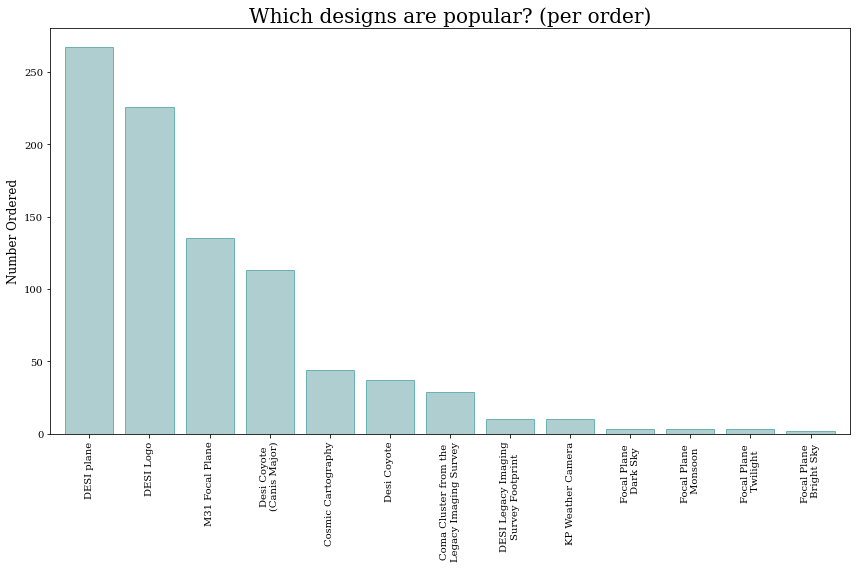

In [8]:
work_cnt = redbubble_data.groupby(['Work'])['Work'].count().sort_values(ascending=False)
fig = plt.figure(figsize=(12,8), facecolor='w')
work_cnt.plot.bar(color='cadetblue', edgecolor='teal', width=0.8, alpha=0.5)
#plt.yticks(np.linspace(0, 20, 6))
#plt.ylim(0, 24)
plt.ylabel('Number Ordered', fontsize=12)
plt.title('Which designs are popular? (per order)', fontsize=20)
plt.xlabel('');
plt.tight_layout();

#fig.savefig('ss_designs.png', dpi=300);

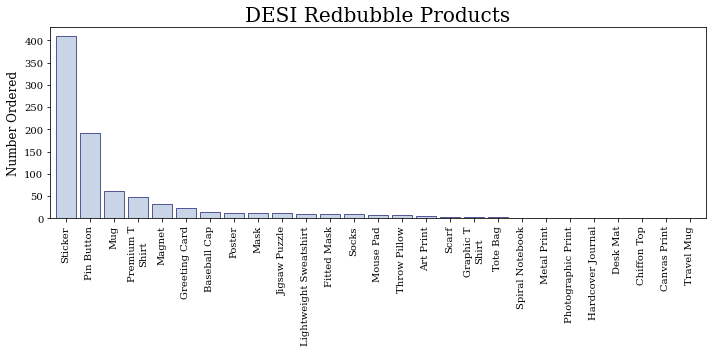

In [9]:
product_cnt = redbubble_data.groupby(['Product'])['Product'].count().sort_values(ascending=False)
fig = plt.figure(figsize=(10,5), facecolor='w')
product_cnt.plot.bar(color='lightsteelblue', alpha=.7, edgecolor='midnightblue', width=0.8)
#plt.yticks(np.linspace(0, 20, 6))
plt.ylabel('Number Ordered', fontsize=12)
plt.title('DESI Redbubble Products', fontsize=20)
plt.xlabel('');
plt.tight_layout();
#plt.ylim(0, 60)

#fig.savefig('ss_products.png', dpi=300);

In [10]:
orders_cnt = redbubble_data.groupby(['Order #'])['Order #'].count()
n_orders = len(orders_cnt)
print('n orders:', n_orders)
print('n products:', len(redbubble_data))

n orders: 116
n products: 882


In [11]:
from collections import Counter
products_types = list(redbubble_data['Product']+redbubble_data['Work'])
#c = (word for word in products_types if word[:1].issupper())
#max(set(products_types), key=products_types.count)
c = Counter(products_types)
c.most_common(10)

[('StickerDESI plane', 138),
 ('StickerDESI Logo', 136),
 ('StickerM31 Focal Plane', 68),
 ('Pin ButtonM31 Focal Plane', 64),
 ('Pin ButtonDESI plane', 63),
 ('Pin ButtonDesi Coyote\n(Canis Major)', 61),
 ('StickerDesi Coyote\n(Canis Major)', 47),
 ('Premium T\nShirtDESI plane', 35),
 ('MugDESI Logo', 30),
 ('MagnetDESI Logo', 26)]

Av. order est.: 173.69857544827585


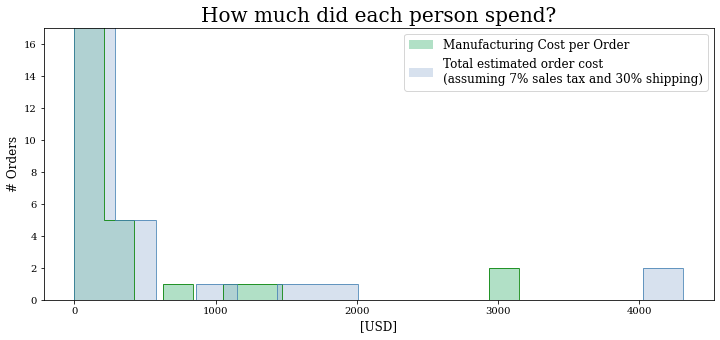

In [12]:
orders_cost = redbubble_data.groupby(['Order #'])['Retail Price (USD)'].sum()

fig = plt.figure(figsize=(12,5))

plt.hist(orders_cost, bins=15, alpha=.4, color='mediumseagreen',
         label='Manufacturing Cost per Order');

plt.hist(orders_cost, histtype='step', bins=15, alpha=.8, color='g')

est_order_cost = orders_cost * 1.07 * 1.28
plt.hist(est_order_cost, bins=15, alpha=.5, color='lightsteelblue',
         label='Total estimated order cost \n(assuming 7% sales tax and 30% shipping)')
plt.hist(est_order_cost, bins=15, alpha=.8, histtype='step', color='steelblue')


plt.ylim(0, 17)
plt.legend(fontsize=12)
plt.xlabel('[USD]', fontsize=12)
plt.ylabel('# Orders', fontsize=12)
plt.title('How much did each person spend?', fontsize=20);

total_manufactoring_cost = orders_cost.sum()
total_est = total_manufactoring_cost * 1.07 * 1.3

print('Av. order est.:', np.mean(est_order_cost))

#fig.savefig('ss_spent.png', dpi=300);

In [13]:
# Summary

print('Number of Orders placed:', n_orders)
print('Est. total spent on orders:', round(total_est))

Number of Orders placed: 116
Est. total spent on orders: 20464
